# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis (EDA) on the financial news dataset. The aim is to extract descriptive statistics, identify trends, and uncover insights that will guide further analysis. Specifically, we will:

- Obtain basic statistics for textual lengths (like headline length).
- Count the number of articles per publisher to identify which publishers are most active.
- Analyze publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


## 1. Importing Necessary Libraries

We begin by importing the required libraries for data manipulation and visualization:

- `pandas` for data handling.
- `matplotlib.pyplot` and `seaborn` for data visualization.

In [6]:
import sys
import os

# Add the scripts folder to the system path
scripts_path = os.path.abspath('../scripts')
print(f"Scripts Path: {scripts_path}")
sys.path.append(scripts_path)
from eda_helpers import calculate_headline_length, count_articles_per_publisher, plot_articles_over_time


Scripts Path: c:\Users\Matrix\Documents\00 TenX\week 1\w1-financial-news-sentiment-analysis\scripts


In [12]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import functions from scripts
## from scripts.eda_helpers import calculate_headline_length, count_articles_per_publisher, plot_articles_over_time


# Setting up visualizations
sns.set(style="whitegrid")

## 2. Loading the Dataset

We load the financial news dataset into a Pandas DataFrame. The dataset contains headlines, publication dates, publishers, and stock ticker symbols.

In [14]:
# Loading the dataset
file_path = '../data/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 1.2. Descriptive Statistics

### 1.2.1 Headline Length Analysis

We calculate the length of each headline and obtain basic statistics such as mean, median, and distribution of headline lengths.


In [15]:
# Calculate headline length
df['headline_length'] = calculate_headline_length(df)
headline_length_stats = df['headline_length'].describe()
print(headline_length_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### 1.2 Article Count per Publisher

Next, we count the number of articles contributed by each publisher. This helps identify the most active publishers in the dataset.


In [16]:
# Count the number of articles per publisher
articles_per_publisher = count_articles_per_publisher(df)
print(articles_per_publisher)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


### 4.3 Publication Date Analysis

We convert the publication dates to a proper datetime format and analyze the distribution over time. We then plot the frequency of articles published to identify any temporal trends.


C:\Users\Matrix\AppData\Local\Temp\ipykernel_1240\3454505481.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


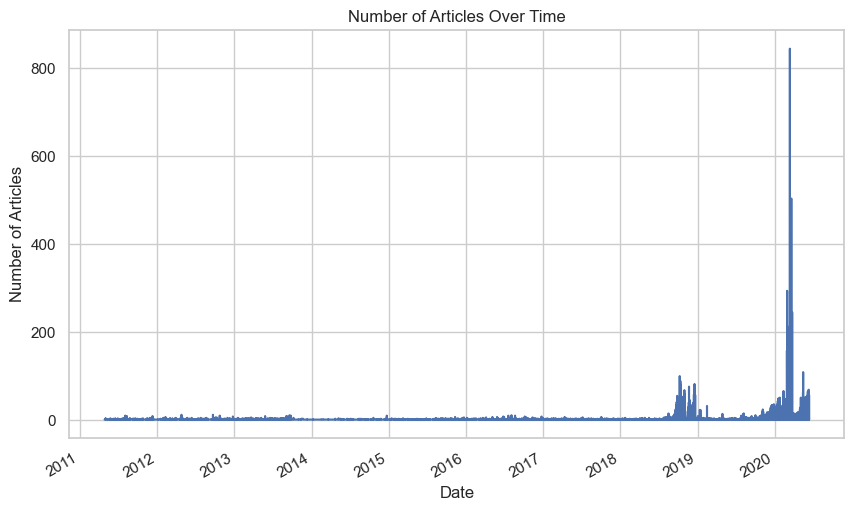

In [ ]:
# Convert 'date' column to datetime format with mixed date formats
df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)

# Analyze the distribution of publication dates
df['date'].describe()

# Plot the number of articles over time
plt.figure(figsize=(10, 6))
df['date'].value_counts().sort_index().plot()
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()